Autor: Moab Alves Silva

#Importando bibliotecas e lendo os dados

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Guardians-DSC/dados/main/orcamento/consulta_siop_orcamento_ufcg.csv", sep = ",")


#Filtrando os dados
Para a filtragem dos dados foi realizada uma seleção utilizando valores da coluna "natureza_de_despesa".
Nessa seleção, foram selecionados gastos que apresentaram uma natureza de despesa relacionada a obras, instalações, iluminação pública e material para conservação de imóveis e bens.

In [3]:
#Verificando quais os valores relacionados aos temas propostos estão presentes nos dados.

OBRAS = df['natureza_de_despesa'].str.contains('OBRAS EM ANDAMENTO')
obras = df['natureza_de_despesa'].str.contains('Obras')
instalacoes = df['natureza_de_despesa'].str.contains('INSTALACOES')
iluminacao = df['natureza_de_despesa'].str.contains('ILUMINACAO')
df.loc[OBRAS + obras + instalacoes + iluminacao].natureza_de_despesa.value_counts()

44905191 - OBRAS EM ANDAMENTO                               33
33903024 - MATERIAL P/ MANUT.DE BENS IMOVEIS/INSTALACOES    32
44905100 - Obras e Instalações                              26
33904722 - CONTRIBUICAO P/ CUSTEIO DE ILUMINACAO PUBLICA    15
44905236 - MAQUINAS, INSTALACOES E UTENS. DE  ESCRITORIO     7
44905192 - INSTALACOES                                       6
Name: natureza_de_despesa, dtype: int64

In [4]:
obras_e_instalacoes = df.natureza_de_despesa.isin(["44905191 - OBRAS EM ANDAMENTO",
                                                   "44905100 - Obras e Instalações",
                                                   "44905192 - INSTALACOES",
                                                   '33903024 - MATERIAL P/ MANUT.DE BENS IMOVEIS/INSTALACOES',
                                                   '33904722 - CONTRIBUICAO P/ CUSTEIO DE ILUMINACAO PUBLICA'
                                                   ])
df_obras = df.loc[obras_e_instalacoes]
df_obras

,ano,orgao_orcamentario,funcao,unidade_orcamentaria,programa,acao,localizador,regiao,uf,municipio,...,fonte,subfuncao,origem_do_credito,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago
100,2012,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"2032 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento das Universidades Federais,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,112 - Código Extinto a partir de 01.jan.2018,364 - Ensino Superior,A - Inicial (LOA),0841 - Ampliar o acesso à educação superior co...,0,0,0,337.781,265.465,252.794
101,2012,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"2032 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento das Universidades Federais,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,250 - Recursos Próprios Primários de Livre Apl...,364 - Ensino Superior,A - Inicial (LOA),0841 - Ampliar o acesso à educação superior co...,0,0,0,210.429,14.429,14.429
173,2012,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"2032 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento das Universidades Federais,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,112 - Código Extinto a partir de 01.jan.2018,364 - Ensino Superior,A - Inicial (LOA),0841 - Ampliar o acesso à educação superior co...,0,0,0,2.146,1.826,1.826
191,2012,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"2032 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento das Universidades Federais,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,112 - Código Extinto a partir de 01.jan.2018,364 - Ensino Superior,A - Inicial (LOA),0841 - Ampliar o acesso à educação superior co...,4.468.228,0,0,0,0,0
192,2012,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"2032 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento das Universidades Federais,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,112 - Código Extinto a partir de 01.jan.2018,364 - Ensino Superior,A - Inicial (LOA),0841 - Ampliar o acesso à educação superior co...,0,0,0,1.913.925,987.959,987.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,2022,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"5013 - Educação Superior - Graduação, Pós-Grad...",8282 - Reestruturação e Modernização das Insti...,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,188 - Recursos Financeiros de Livre Aplicação,364 - Ensino Superior,A - Inicial (LOA),1237 - Fomentar a formação de pessoal qualific...,0,0,0,2.000.000,0,0
4683,2022,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"5013 - Educação Superior - Graduação, Pós-Grad...",8282 - Reestruturação e Modernização das Insti...,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,188 - Recursos Financeiros de Livre Aplicação,364 - Ensino Superior,A - Inicial (LOA),1237 - Fomentar a formação de pessoal qualific...,0,0,0,4.195.281,0,0
4848,2023,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"5013 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento de Instituições Federais ...,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,1000 - Recursos Livres da União,364 - Ensino Superior,A - Inicial (LOA),1237 - Fomentar a formação de pessoal qualific...,0,0,0,2.232,0,0
4904,2023,26000 - Ministério da Educação,12 - Educação,26252 - Universidade Federal de Campina Grande,"5013 - Educação Superior - Graduação, Pós-Grad...",20RK - Funcionamento de Instituições Federais ...,0025 - No Estado da Paraíba,NE - Região Nordeste,PB - Paraíba,-,...,

#Tratamento dos dados
O tratamento dos dados foi apenas conversões de valores númericos para tornar possível a realização de operações matemáticas nas colunas: empenhado, projeto_de_lei, liquidado e pago.

In [5]:
df_obras.empenhado = df_obras.empenhado.astype("str").map(lambda gasto : gasto.replace(".", ""))
df_obras.empenhado = df_obras.empenhado.astype("int64")
df_obras.empenhado

<ipython-input-5-a3aba6732c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.empenhado = df_obras.empenhado.astype("str").map(lambda gasto : gasto.replace(".", ""))
<ipython-input-5-a3aba6732c3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.empenhado = df_obras.empenhado.astype("int64")


100      337781
101      210429
173        2146
191           0
192     1913925
         ...   
4682    2000000
4683    4195281
4848       2232
4904          0
4952      10813
Name: empenhado, Length: 112, dtype: int64

In [6]:
df_obras.projeto_de_lei = df_obras.projeto_de_lei.astype("str").map(lambda gasto : gasto.replace(".", ""))
df_obras.projeto_de_lei = df_obras.projeto_de_lei.astype("int64")
df_obras.projeto_de_lei

<ipython-input-6-1731b3edc94b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.projeto_de_lei = df_obras.projeto_de_lei.astype("str").map(lambda gasto : gasto.replace(".", ""))
<ipython-input-6-1731b3edc94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.projeto_de_lei = df_obras.projeto_de_lei.astype("int64")


100           0
101           0
173           0
191     4468228
192           0
         ...   
4682          0
4683          0
4848          0
4904     500000
4952          0
Name: projeto_de_lei, Length: 112, dtype: int64

In [7]:
df_obras.liquidado = df_obras.liquidado.astype("str").map(lambda gasto : gasto.replace(".", ""))
df_obras.liquidado = df_obras.liquidado.astype("int64")
df_obras.liquidado

<ipython-input-7-bc90bcd9d6c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.liquidado = df_obras.liquidado.astype("str").map(lambda gasto : gasto.replace(".", ""))
<ipython-input-7-bc90bcd9d6c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.liquidado = df_obras.liquidado.astype("int64")


100     265465
101      14429
173       1826
191          0
192     987959
         ...  
4682         0
4683         0
4848         0
4904         0
4952     10813
Name: liquidado, Length: 112, dtype: int64

In [8]:
df_obras.pago = df_obras.pago.astype("str").map(lambda gasto : gasto.replace(".", ""))
df_obras.pago = df_obras.pago.astype("int64")
df_obras.pago

<ipython-input-8-cc5384715fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.pago = df_obras.pago.astype("str").map(lambda gasto : gasto.replace(".", ""))
<ipython-input-8-cc5384715fe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obras.pago = df_obras.pago.astype("int64")


100     252794
101      14429
173       1826
191          0
192     987959
         ...  
4682         0
4683         0
4848         0
4904         0
4952     10813
Name: pago, Length: 112, dtype: int64

#Agrupando os dados


##Total gasto por ano

In [9]:
gastos_por_ano = df_obras[['ano', 'empenhado', 'projeto_de_lei', 'liquidado', 'pago']]
gastos_por_ano = gastos_por_ano.groupby('ano').sum()
gastos_por_ano['empenhado_e_projeto'] = gastos_por_ano['projeto_de_lei'] + gastos_por_ano['empenhado']
gastos_por_ano['empenhado_e_projeto']

ano
2012    28749893
2013    35597021
2014    35519216
2015    27876874
2016    26885437
2017    22624222
2018     3799847
2019    30807192
2020     1784031
2021     3751605
2022     9432883
2023      513045
Name: empenhado_e_projeto, dtype: int64

In [30]:
gastos_por_ano = gastos_por_ano.reset_index()
gastos_por_ano

,level_0,index,ano,empenhado,projeto_de_lei,liquidado,pago,empenhado_e_projeto
0,0,0,2012,16801748,11948145,5809836,5797165,28749893
1,1,1,2013,19057104,16539917,10279359,9672302,35597021
2,2,2,2014,14534589,20984627,7217605,6954082,35519216
3,3,3,2015,8376874,19500000,3545957,2729268,27876874
4,4,4,2016,8983812,17901625,2794743,2794743,26885437
5,5,5,2017,691931,21932291,598313,591268,22624222
6,6,6,2018,889961,2909886,202404,202404,3799847
7,7,7,2019,30807192,0,1691854,1691854,30807192
8,8,8,2020,1784031,0,108267,108267,1784031
9,9,9,2021,1751605,2000000,109594,109594,3751605


## Gastos por natureza de despesa

In [25]:
df_obras.natureza_de_despesa.unique()

array(['33903024 - MATERIAL P/ MANUT.DE BENS IMOVEIS/INSTALACOES',
       '33904722 - CONTRIBUICAO P/ CUSTEIO DE ILUMINACAO PUBLICA',
       '44905100 - Obras e Instalações', '44905191 - OBRAS EM ANDAMENTO',
       '44905192 - INSTALACOES'], dtype=object)

In [35]:
#Colunas a serem selecionadas no agrupamento
col_gastos = ['ano', 'empenhado', 'projeto_de_lei', 'liquidado', 'pago']

#Linhas dos gastos em que a natureza de despesa é obras em andamento
obras_em_andamento = df_obras.natureza_de_despesa == "44905191 - OBRAS EM ANDAMENTO"

#Agrupando as colunas selecionadas por ano, nas linhas em que a natureza de despesa é obras em andamento
gastos_obras_andamento = df_obras.loc[obras_em_andamento][col_gastos].groupby("ano").sum()
gastos_obras_andamento.reset_index()
gastos_obras_andamento

,empenhado,projeto_de_lei,liquidado,pago
ano,,,,
2012,15854437,0,5359926,5359926
2013,17920864,0,9630079,9117860
2014,12438683,0,5213979,4963819
2015,7846017,0,3262160,2579426
2016,8253735,0,2649445,2649445
2017,189186,0,189186,189186
2018,616690,0,17953,17953
2019,30372471,0,1557574,1557574
2020,1544993,0,22276,22276


O mesmo procedimento descrito a cima foi feito a seguir para outras naturezas.

In [38]:
obras_instalacoes = df_obras.natureza_de_despesa == "44905100 - Obras e Instalações"
gastos_obras_instalacoes = df_obras.loc[obras_instalacoes][col_gastos].groupby("ano").sum()
gastos_obras_instalacoes.reset_index()

,ano,empenhado,projeto_de_lei,liquidado,pago
0,2012,0,11948145,0,0
1,2013,0,16539917,0,0
2,2014,0,20984627,0,0
3,2015,0,19500000,0,0
4,2016,0,17901625,0,0
5,2017,0,21932291,0,0
6,2018,0,2909886,0,0
7,2021,0,2000000,0,0
8,2022,0,1650000,0,0
9,2023,0,500000,0,0


In [39]:
instalacoes = df_obras.natureza_de_despesa == "44905192 - INSTALACOES"
gastos_instalacoes = df_obras.loc[instalacoes][col_gastos].groupby("ano").sum()
gastos_instalacoes.reset_index()
gastos_instalacoes

,empenhado,projeto_de_lei,liquidado,pago
ano,,,,
2012,345444,0,127885,127885
2013,312500,0,225270,225270
2014,218969,0,218969,218969
2016,512761,0,0,0


In [40]:
material = df_obras.natureza_de_despesa == "33903024 - MATERIAL P/ MANUT.DE BENS IMOVEIS/INSTALACOES"
gastos_material = df_obras.loc[material][col_gastos].groupby("ano").sum()
gastos_material.reset_index()
gastos_material

,empenhado,projeto_de_lei,liquidado,pago
ano,,,,
2012,570202,0,293417,280746
2013,787123,0,393026,298188
2014,1825076,0,1750672,1737309
2015,466920,0,225084,95973
2016,144036,0,82493,82493
2017,363012,0,318784,311739
2018,113924,0,108807,108807
2019,354397,0,117341,117341
2020,196698,0,45483,45483


In [41]:
iluminacao = df_obras.natureza_de_despesa == "33904722 - CONTRIBUICAO P/ CUSTEIO DE ILUMINACAO PUBLICA"
gastos_iluminacao = df_obras.loc[iluminacao][col_gastos].groupby("ano").sum()
gastos_iluminacao.reset_index()
gastos_iluminacao

,empenhado,projeto_de_lei,liquidado,pago
ano,,,,
2012,31665,0,28608,28608
2013,36617,0,30984,30984
2014,51861,0,33985,33985
2015,63937,0,58713,53869
2016,73280,0,62805,62805
2017,139733,0,90343,90343
2018,159347,0,75644,75644
2019,80324,0,16939,16939
2020,42340,0,40508,40508


#Análise

##Programa e Localizador


Os seguintes programas aparecem nos gastos com obras, o interessante é que a cada 4 anos o programa predominante muda.
* '2032 - Educação Superior - Graduação, Pós-Graduação, Ensino, Pesquisa e Extensão',
* '2031 - Educação Profissional e Tecnológica',
* '2080 - Educação de qualidade para todos',
* '5013 - Educação Superior - Graduação, Pós-Graduação, Ensino, Pesquisa e Extensão'

<Axes: xlabel='ano', ylabel='Count'>

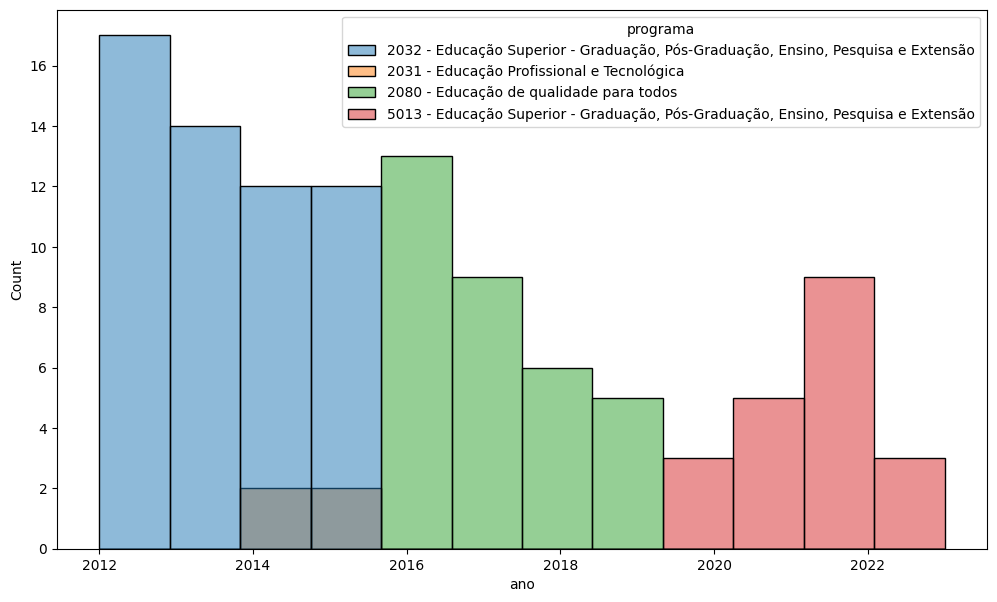

In [11]:
plt.figure(figsize = (12, 7))
sns.histplot(data = df_obras, x = "ano", hue = "programa", bins = 12)


### Localização dos Gastos
Não há como realizar uma análise mais detalhada em relação aos gastos realizados em cada campus/município no setor de obras, visto que a grande maioria dos valores não específica uma localização.

In [12]:
df_obras.regiao.value_counts()

NE - Região Nordeste    112
Name: regiao, dtype: int64

In [13]:
df_obras.municipio.value_counts()

-                           109
2503704 - Cajazeiras          2
2504009 - Campina Grande      1
Name: municipio, dtype: int64

In [14]:
df_obras.localizador.value_counts()

0025 - No Estado da Paraíba                                                                    108
0168 - Campus Cajazeiras - Cajazeiras - PB                                                       1
7008 - Implantação do Curso de Engenharia Civil, No Campus de Pombal - No Estado da Paraíba      1
1392 - No Município de Campina Grande - PB                                                       1
1388 - No Município de Cajazeiras - PB                                                           1
Name: localizador, dtype: int64

##Valores gastos
Nos presentes dados, quando um gasto possui valor especificado na coluna empenhado, ele não possui nada na coluna projeto de lei. Assim, quando separamos esses gastos obtemos as seguintes visualizações:

<Axes: title={'center': 'Projeto de Lei'}, xlabel='ano', ylabel='projeto_de_lei'>

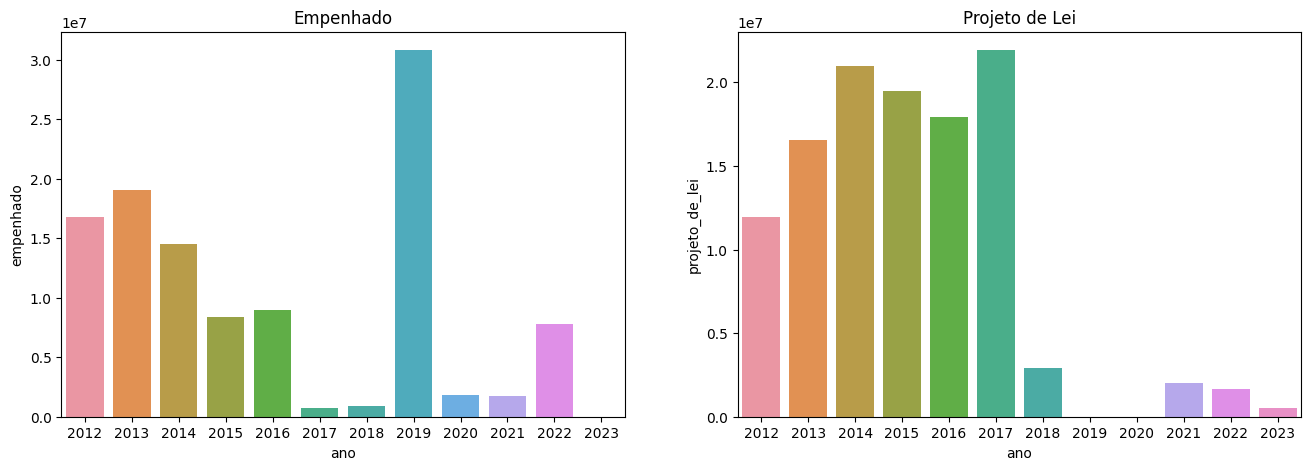

In [15]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
plt.title("Empenhado")
sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.empenhado)

plt.subplot(1,2,2)
plt.title("Projeto de Lei")
sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.projeto_de_lei)

Sendo assim, para obter uma visualização mais ampla dessas duas colunas juntas, foi realizada uma distribuição total.

<Axes: title={'center': 'Gastos por ano'}, xlabel='Ano', ylabel='Valor gasto'>

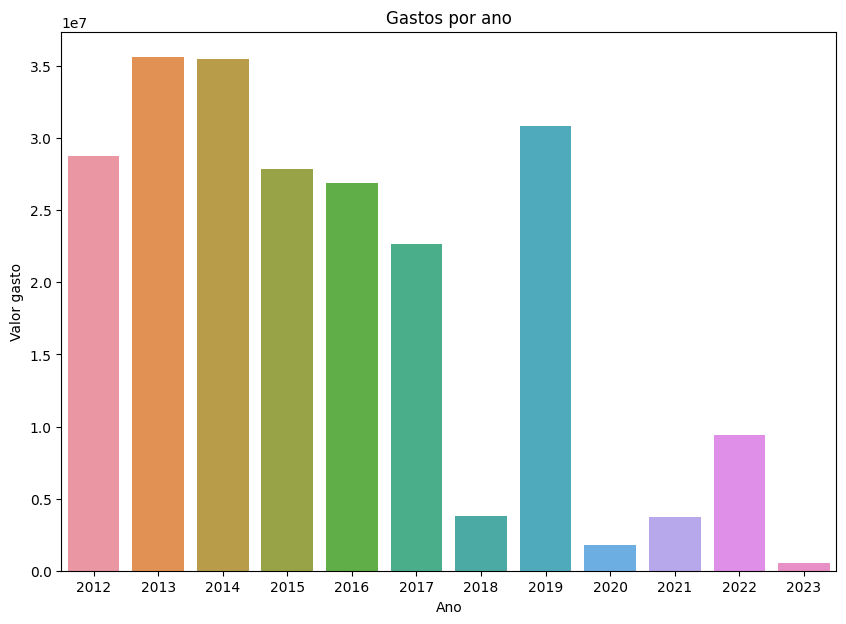

In [16]:
plt.figure(figsize = (10, 7))
plt.title("Gastos por ano")
g = sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.empenhado_e_projeto)
g.set(xlabel = "Ano", ylabel = "Valor gasto")
g

Como é possível visualizar no gráfico acima, há uma grande queda no valor gasto no ano de 2018 com obras.

 Enquanto nos anos seguintes a 2019, que podem confirmar a hipótese de que durante a pandemia esse setor gastou menos.

###Distribuição dos gastos

Enquanto a queda de gastos de gastos de 2020-2021 tem uma forte hipótese que pode justificá-la, a queda de 2018 não tem. Algo que poderia explicá-la seria a possibilidade dos gastos desse ano terem sido registrados com outra natureza de despesa (que não especifica o gasto como um gasto de obra), o que faria com que eles tivessem ficado de fora da seleção realizada neste notebook.

> Para investigar mais a grande queda de valores no ano de 2018, foi realizada uma visualização da distribuição geral no número de gastos, pois um valor em 2018 abaixo dos demais poderia confirmar a hipótese anterior.




<Axes: xlabel='ano', ylabel='Count'>

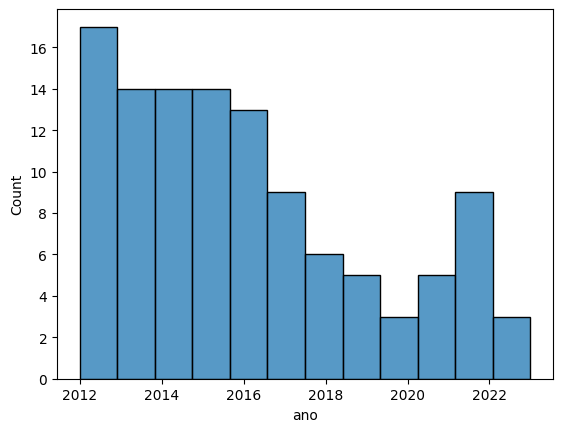

In [17]:

sns.histplot(df_obras.ano, bins = 12)

No entanto, não se pôde confirmar a hipótese visto que há mais gastos em 2018 do que em 2019, enquanto o valor empenhado em ambos os anos é bem diferente.
Logo, os resultados indicam que em 2018 houve uma forte queda no valor gasto com obras na UFCG.

### Empenhado, liquidado e pago

A seguir, foram analisadas as colunas empenhado, liquidado e pago.

In [18]:
gastos_por_ano

,ano,empenhado,projeto_de_lei,liquidado,pago,empenhado_e_projeto
0,2012,16801748,11948145,5809836,5797165,28749893
1,2013,19057104,16539917,10279359,9672302,35597021
2,2014,14534589,20984627,7217605,6954082,35519216
3,2015,8376874,19500000,3545957,2729268,27876874
4,2016,8983812,17901625,2794743,2794743,26885437
5,2017,691931,21932291,598313,591268,22624222
6,2018,889961,2909886,202404,202404,3799847
7,2019,30807192,0,1691854,1691854,30807192
8,2020,1784031,0,108267,108267,1784031
9,2021,1751605,2000000,109594,109594,3751605


<Axes: xlabel='ano', ylabel='empenhado'>

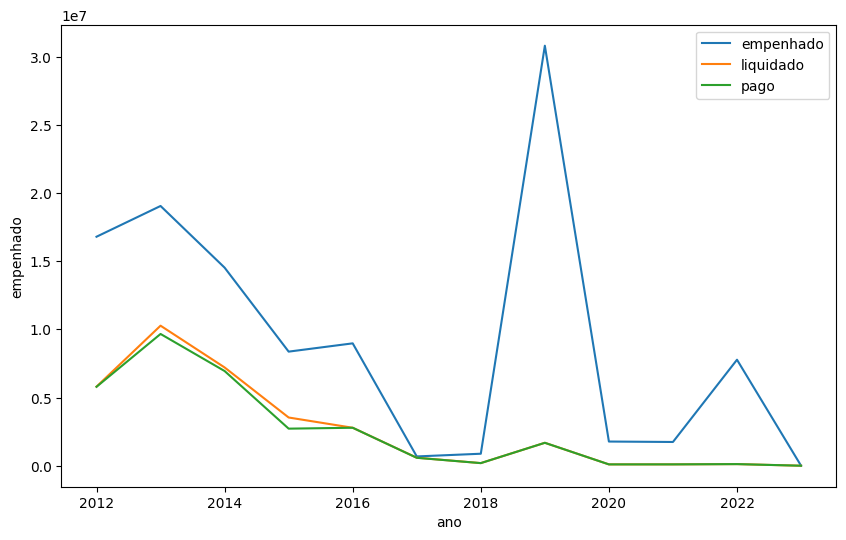

In [51]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'pago', label = 'pago')

Assim, fica claro que por mais que 2019 tenha sido o ano que mais empenhou gastos, o valor não foi liquidado não acompanhou o empenhado.

## Natureza

<Axes: title={'center': 'Instalações'}, xlabel='ano', ylabel='empenhado'>

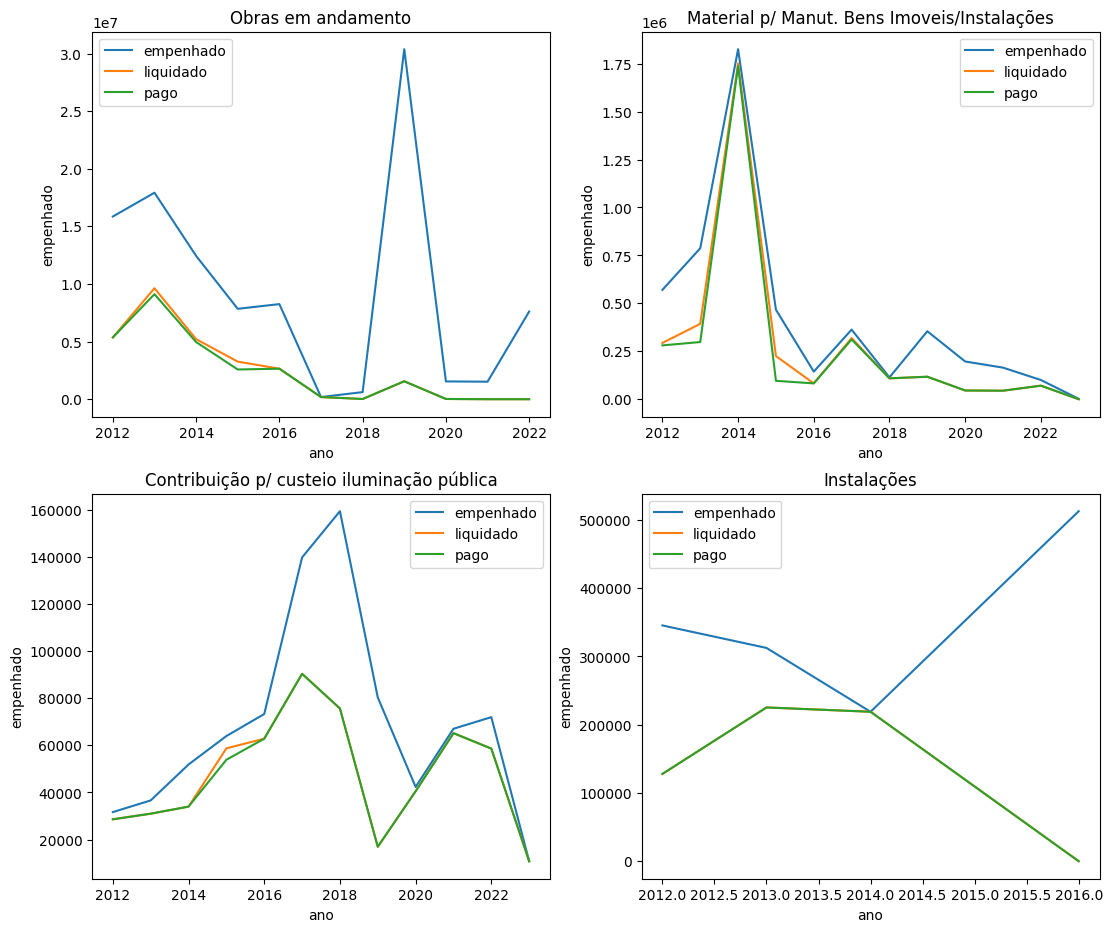

In [65]:
plt.figure(figsize = (13, 11))

plt.subplot(2, 2, 1)
plt.title("Obras em andamento")
sns.lineplot(data = gastos_obras_andamento, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_obras_andamento, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_obras_andamento, x = 'ano', y = 'pago', label = 'pago')

plt.subplot(2, 2, 2)
plt.title("Material p/ Manut. Bens Imoveis/Instalações")
sns.lineplot(data = gastos_material, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_material, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_material, x = 'ano', y = 'pago', label = 'pago')

plt.subplot(2, 2, 3)
plt.title("Contribuição p/ custeio iluminação pública")
sns.lineplot(data = gastos_iluminacao, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_iluminacao, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_iluminacao, x = 'ano', y = 'pago', label = 'pago')

plt.subplot(2, 2, 4)
plt.title("Instalações")
sns.lineplot(data = gastos_instalacoes, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_instalacoes, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_instalacoes, x = 'ano', y = 'pago', label = 'pago')

Nota-se que o grande diferencial entre empenhado e liquidade em 2019, é proveniente de obras em andamento.

#Conclusões

## Localização
Houve o interesse de se realizar uma análise sobre a relação de gastos com obras e os municípios e campi da UFCG, porém com os dados obtidos na consulta ao SIOP não foi possível estabelecer estabelecer essa relação, visto que os valores que especificam localização indicam localidades específicas para a grande maioria dos dados.

A coluna "município" apresenta o valor "-" para 109 dos valores, enquanto os outros 3 valores são do município de cajazeiras e 1 de Campina Grande

Enquanto a coluna "localizador" apresenta o valor "0025 - No Estado da Paraíba" para 108 entradas, tendo apenas as outras 4 um município específico.





##Valor empenhado e projeto de lei
### Estágio de empenho
Segundo o Portal da Transparência da Controladoria-Geral da União, no estágio de empenho é criada a obrigação de pagamento da despesa pelo governo ao credor, então há a reserva de valores monetários autorizados para atender um fim específico.

Esses valores empenhados são registrados no momento da contratação de serviços, aquisição do material ou bem, obra ou amortização da dívida.

### Empenho e Projeto de Lei
Os dados consultados estão divididos naqueles em que há um valor de empenho e naqueles que há valor de projeto de lei. Sendo assim, para verificar o quando é investido em obras, ambas colunas foram analisadas separadamente e depois juntas.


<Axes: title={'center': 'Projeto de Lei'}, xlabel='ano', ylabel='projeto_de_lei'>

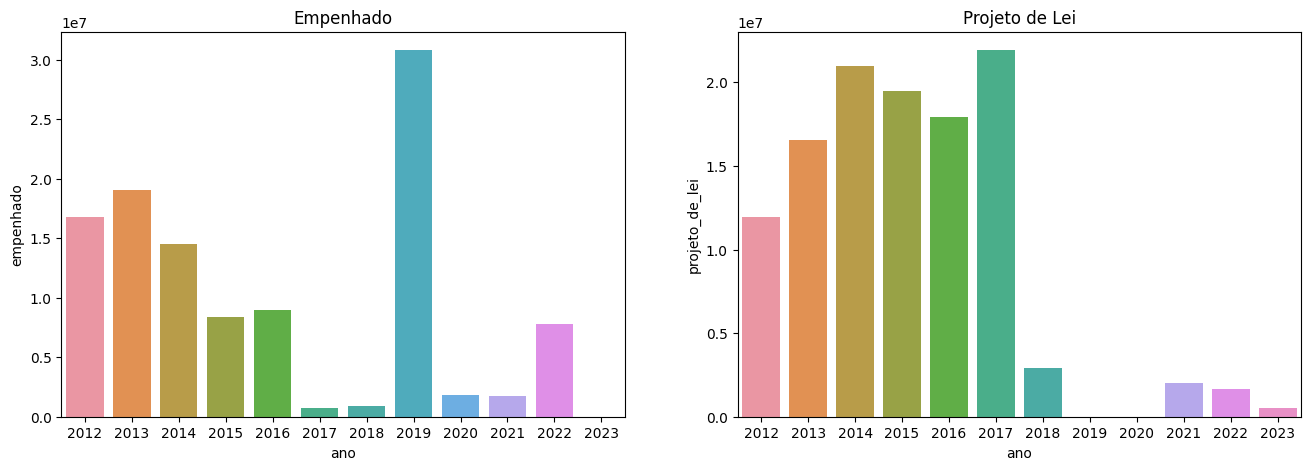

In [20]:
# @title Gráfico de Empenho e Projeto de Lei
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
plt.title("Empenhado")
sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.empenhado)

plt.subplot(1,2,2)
plt.title("Projeto de Lei")
sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.projeto_de_lei)

Os gráficos acima apresentam um somatório do valor "gasto" em cada ano em ambas colunas.
Nos anos de 2019 e 2020, todos os valores estão na coluna empenhado. Enquanto em anos como 2017 e 2018, os valores estão majoritariamente presentes na coluna projeto de lei.




<Axes: xlabel='Ano', ylabel='Valor gasto'>

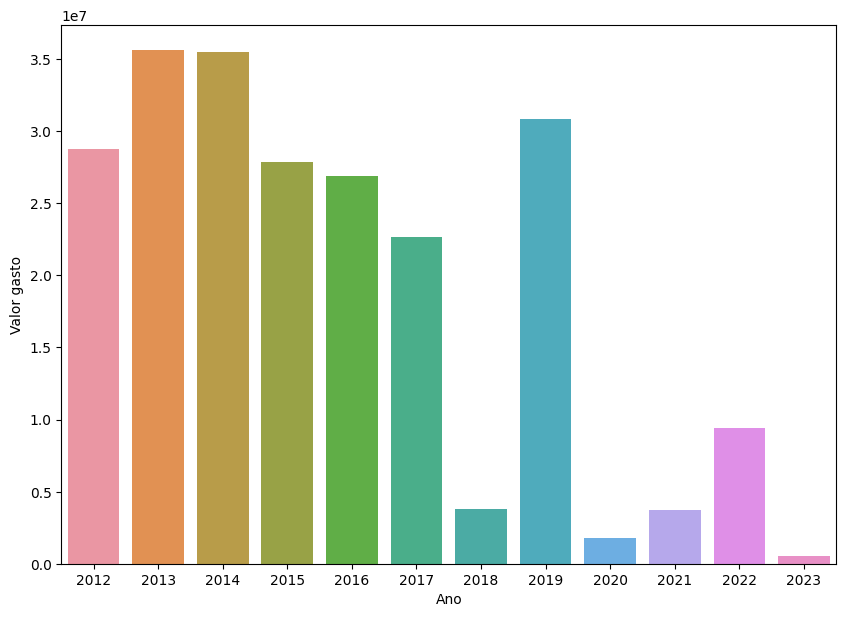

In [21]:
# @title Empenhado e Projeto de Lei
plt.figure(figsize = (10, 7))
g = sns.barplot(x = gastos_por_ano.ano, y = gastos_por_ano.empenhado_e_projeto)
g.set(xlabel = "Ano", ylabel = "Valor gasto")
g

No gráfico acima observa-se uma forte queda no ano de 2018 e nos anos de 2020 e 2021.

Em relação ao ano de 2018, a primeira hipótese levantada foi a possibilidade desses dados terem sido cadastrados com uma natureza de despesa diferente das demais (que não especificasse o gasto em obras), no entanto ao verificar a distribuição de gastos com obras, foi visto que o número de gastos de 2018 foi normal em relação aos demais anos.

Enquanto a queda nos anos de 2020 e 2021 levanta a hipótese de que o período de pandemia reduziu o número de gastos no setor, já o crescimento em 2022 pode ser justificado pelo retorno de atividades presenciais que trouxe a necessidade imediata de melhorias na infraestrutura.

## Comparação empenhado, liquidado e pago.

In [22]:
gastos_por_ano

,ano,empenhado,projeto_de_lei,liquidado,pago,empenhado_e_projeto
0,2012,16801748,11948145,5809836,5797165,28749893
1,2013,19057104,16539917,10279359,9672302,35597021
2,2014,14534589,20984627,7217605,6954082,35519216
3,2015,8376874,19500000,3545957,2729268,27876874
4,2016,8983812,17901625,2794743,2794743,26885437
5,2017,691931,21932291,598313,591268,22624222
6,2018,889961,2909886,202404,202404,3799847
7,2019,30807192,0,1691854,1691854,30807192
8,2020,1784031,0,108267,108267,1784031
9,2021,1751605,2000000,109594,109594,3751605


<Axes: xlabel='ano', ylabel='empenhado'>

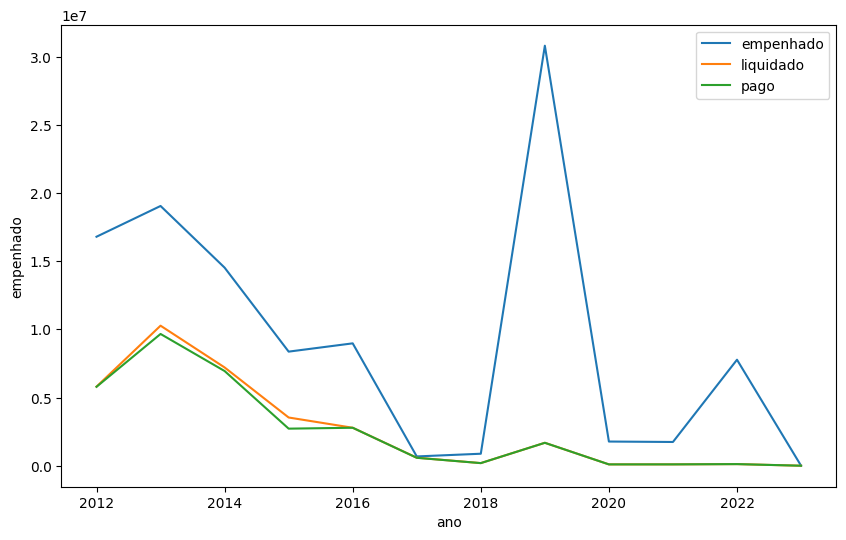

In [23]:
# @title Empenhado, liquidado e pago por ano.
plt.figure(figsize = (10, 6))
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'empenhado', label = 'empenhado')
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'liquidado', label = 'liquidado')
sns.lineplot(data = gastos_por_ano, x = 'ano', y = 'pago', label = 'pago')

Como observado no gráfico acima e também na tabela, o valor empenhado por ano é maior que o liquidado e pago na maioria dos anos.

Anteriormente, observou-se que houve um forte aumento no valor empenhado no ano de 2019, no entanto esse forte aumento não refletiu no valor liquidado.

Logo, pode se concluir que houve nesses anos dinheiro autorizado (empenhado) para a realização desses serviços, mas que não chegou a ser liquidado. O valor é liquidado quando há a realização do serviço, como diz o Portal da Transparência da controladoria-geral da união: "É nesse segundo estágio da execução da despesa que será cobrada a prestação dos serviços ou a entrega dos bens, ou ainda, a realização da obra. Envolve, portanto, todos os atos de verificação e conferência, desde a entrega do material ou a prestação do serviço até o reconhecimento da despesa."


# Referência
https://portaldatransparencia.gov.br/pagina-interna/603453-dicionario-de-dados-execucao-da-despesa